In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [4]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [5]:
pd.set_option('display.max_columns', None)
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Spectral')
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('Advertising_Data.csv')
df.head()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.0
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.0
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.0
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.0
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.0


In [7]:
# Data Quality Check
- Q1: Are there any features whose data type does not match?
- Q2: Are there duplicates, missing values or outliers?

Object `match` not found.
Object `outliers` not found.


In [8]:
## Question 1
Are there any features whose data type does not match?

Object `match` not found.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TV                    300 non-null    float64
 1   Billboards            300 non-null    float64
 2   Google_Ads            300 non-null    float64
 3   Social_Media          300 non-null    float64
 4   Influencer_Marketing  300 non-null    float64
 5   Affiliate_Marketing   300 non-null    float64
 6   Product_Sold          300 non-null    float64
dtypes: float64(7)
memory usage: 16.5 KB


In [10]:
### Question 2

In [11]:
df.duplicated().sum()

0

In [12]:
### Missing Values

In [13]:
df.isna().sum().sort_values(ascending=False)

TV                      0
Billboards              0
Google_Ads              0
Social_Media            0
Influencer_Marketing    0
Affiliate_Marketing     0
Product_Sold            0
dtype: int64

In [14]:
## We dont see any missing or NaN values here.

In [15]:
df.columns

Index(['TV', 'Billboards', 'Google_Ads', 'Social_Media',
       'Influencer_Marketing', 'Affiliate_Marketing', 'Product_Sold'],
      dtype='object')

In [16]:
# Data Insight

In [17]:
df.head()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.0
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.0
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.0
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.0
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.0


In [18]:
# Number of rows and columns

In [19]:
df.shape

(300, 7)

In [20]:
df.describe()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,517.431000,502.644933,512.444133,489.800100,465.732567,484.430633,7031.523333
std,288.114792,275.842369,285.422376,273.883915,288.314080,277.955458,1703.614951
min,1.040000,3.630000,14.860000,11.690000,0.770000,6.740000,2259.000000
25%,273.090000,277.912500,250.530000,265.612500,214.480000,267.677500,5922.500000
50%,513.970000,533.020000,528.965000,486.385000,480.355000,451.315000,7051.000000
75%,774.275000,745.005000,763.345000,695.117500,703.092500,721.065000,8278.000000
max,998.100000,995.320000,999.230000,996.160000,999.830000,987.580000,12227.000000


In [21]:
#Exploratory Data Analysis
#Lets look at the data distributions using pairplots

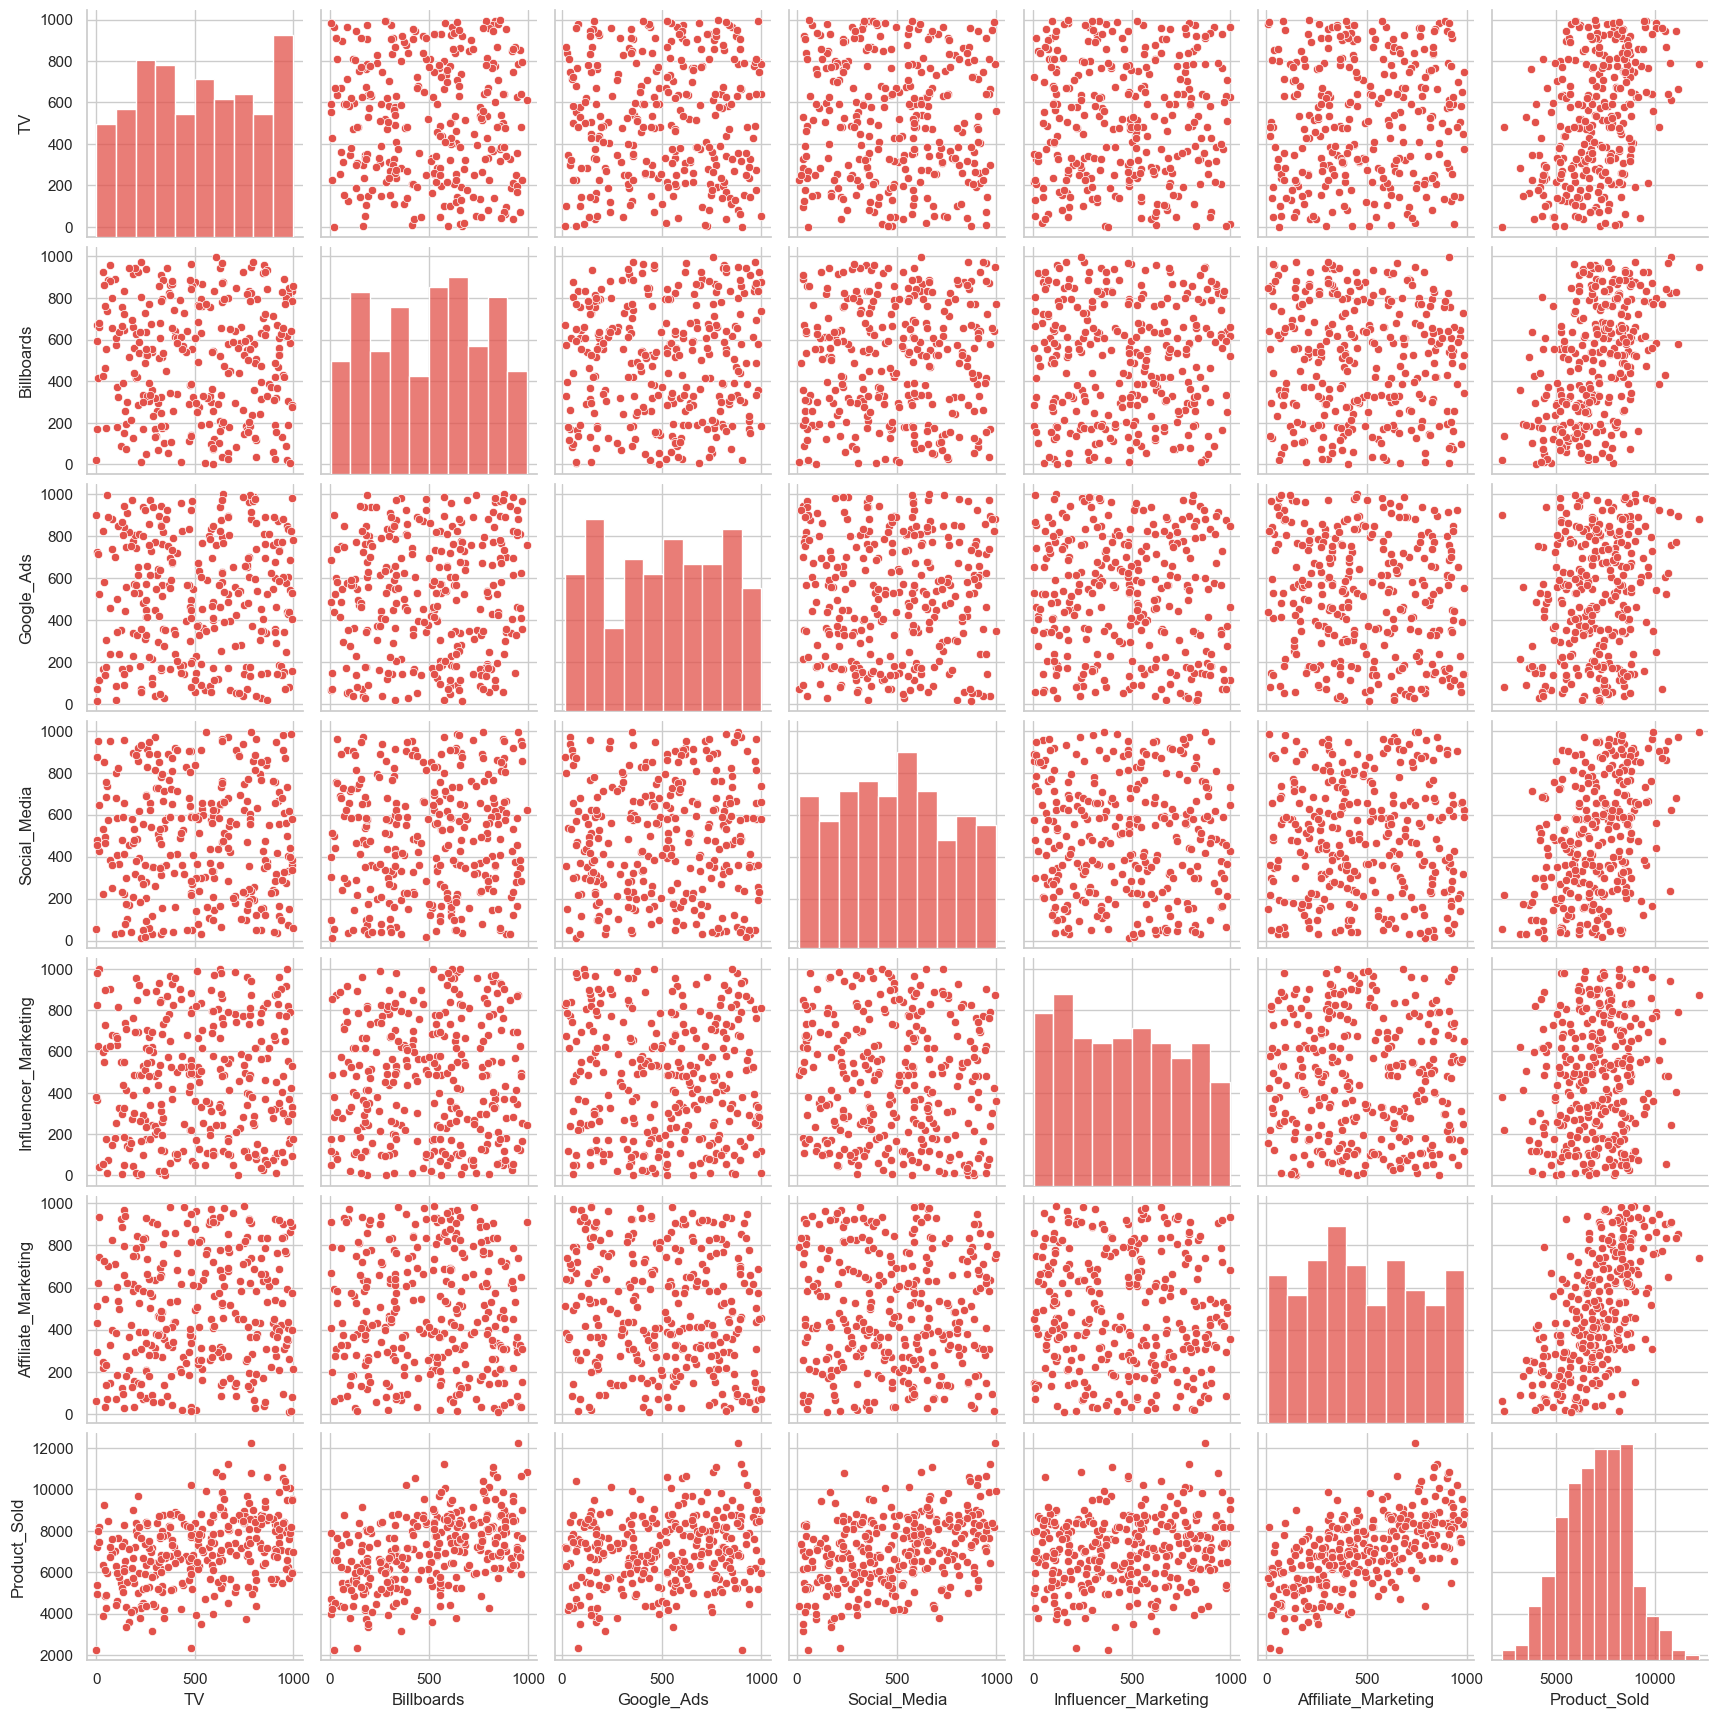

In [22]:
sns.pairplot(df)

In [23]:
y = df[["Product_Sold"]]
y

,Product_Sold
0,7164.0
1,5055.0
2,6154.0
3,5480.0
4,9669.0
...,...
295,6851.0
296,6477.0
297,6949.0
298,7737.0


In [24]:
X = df.drop("Product_Sold", axis = 1 )
X

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing
0,281.42,538.80,123.94,349.30,242.77,910.10
1,702.97,296.53,558.13,180.55,781.06,132.43
2,313.14,295.94,642.96,505.71,438.91,464.23
3,898.52,61.27,548.73,240.93,278.96,432.27
4,766.52,550.72,651.91,666.33,396.33,841.93
...,...,...,...,...,...,...
295,770.05,501.36,694.60,172.26,572.26,410.56
296,512.38,250.83,373.78,366.95,987.14,509.03
297,998.10,858.75,781.06,60.61,174.63,213.53
298,322.35,681.22,640.29,343.65,534.22,648.71


In [25]:
#Split the data into Train, Validation and Test set (70%,15%,15%)

In [26]:
X_train, X_test_full, y_train, y_test_full = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_test, X_valid, y_test, y_valid = train_test_split(X_test_full, y_test_full, test_size = 0.5, random_state = 42)
print(f"X_train shape is:{X_train.shape}")
print(f"X_train shape is:{X_test.shape}")
print(f"X_train shape is:{X_valid.shape}")

X_train shape is:(210, 6)
X_train shape is:(45, 6)
X_train shape is:(45, 6)


In [27]:
#Data Transformation
#Lets transform the data using standard scaler

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [29]:
X_test_scaled = scaler.transform(X_test)
X_valid_scaled = scaler.transform(X_valid)

In [30]:
linear_model = LinearRegression().fit(X_train_scaled, y_train)

In [31]:
linear_model.score(X_train_scaled, y_train)

0.9999622286205176

In [32]:
linear_model.coef_

array([[ 581.51885111,  825.70915192,  423.92011937,  689.59592971,
         348.77627659, 1109.0700281 ]])

In [33]:
## If we observer coefficients more weight is give for "Affiliate_Marketing" because it explains the variance in product_sold better than other variables. This can be observed in seaborn pairplot as well

In [34]:
linear_model.intercept_

array([6998.36666667])

In [35]:
#validation of the model

In [36]:
y_valid_pred = linear_model.predict(X_valid_scaled)
valid_r2_score = r2_score(y_valid, y_valid_pred)
print( f"R2 score for validation dataset is :{valid_r2_score}")

R2 score for validation dataset is :0.9999700982730199


In [37]:
y_test_pred = linear_model.predict(X_test_scaled)
test_r2_score = r2_score(y_test, y_test_pred)
print( f"R2 score for test dataset is :{test_r2_score}")

R2 score for test dataset is :0.9999601568574745


In [38]:
y_test_pred = pd.DataFrame(y_test_pred)

# Concatenate y_test and y_pred along the rows axis
comparison_df = pd.concat([y_test.reset_index(drop=True), y_test_pred.reset_index(drop=True)], axis=1)
comparison_df.columns = ['Actual', 'Predicted']  # Rename columns

# Print the DataFrame
print(comparison_df)

     Actual     Predicted
0    8943.0   8942.648288
1    7395.0   7388.713703
2    8652.0   8650.268668
3    7455.0   7452.492425
4    6356.0   6367.446976
5    7627.0   7621.360389
6    9658.0   9648.243099
7   10841.0  10827.838222
8    6827.0   6820.057039
9    3726.0   3736.179670
10   5279.0   5260.274431
11  11210.0  11196.109479
12   6949.0   6959.343191
13  10543.0  10544.048793
14   7282.0   7265.679512
15   8683.0   8683.232699
16   6598.0   6617.601608
17   5337.0   5352.196629
18   7848.0   7840.806821
19   4824.0   4823.766417
20   7838.0   7842.873851
21   7964.0   7946.080223
22   8332.0   8331.211326
23   9244.0   9230.459569
24   8504.0   8497.752462
25   7383.0   7392.182275
26   5255.0   5251.797091
27   8564.0   8576.067274
28   3878.0   3853.207508
29   6984.0   6988.064403
30   5519.0   5499.447068
31   8396.0   8400.816515
32   8574.0   8576.328192
33   8230.0   8216.689422
34   7803.0   7798.510235
35   8277.0   8269.127275
36   9540.0   9548.478687
37   5881.0 

In [39]:
## We could predict test values with a R2_score of 0.9999601568574745 using Linear Regression Model. Higher the R2_score higher the model is able to predict the variance of Product_sold.

In [40]:
## Exploratory Data Analysis

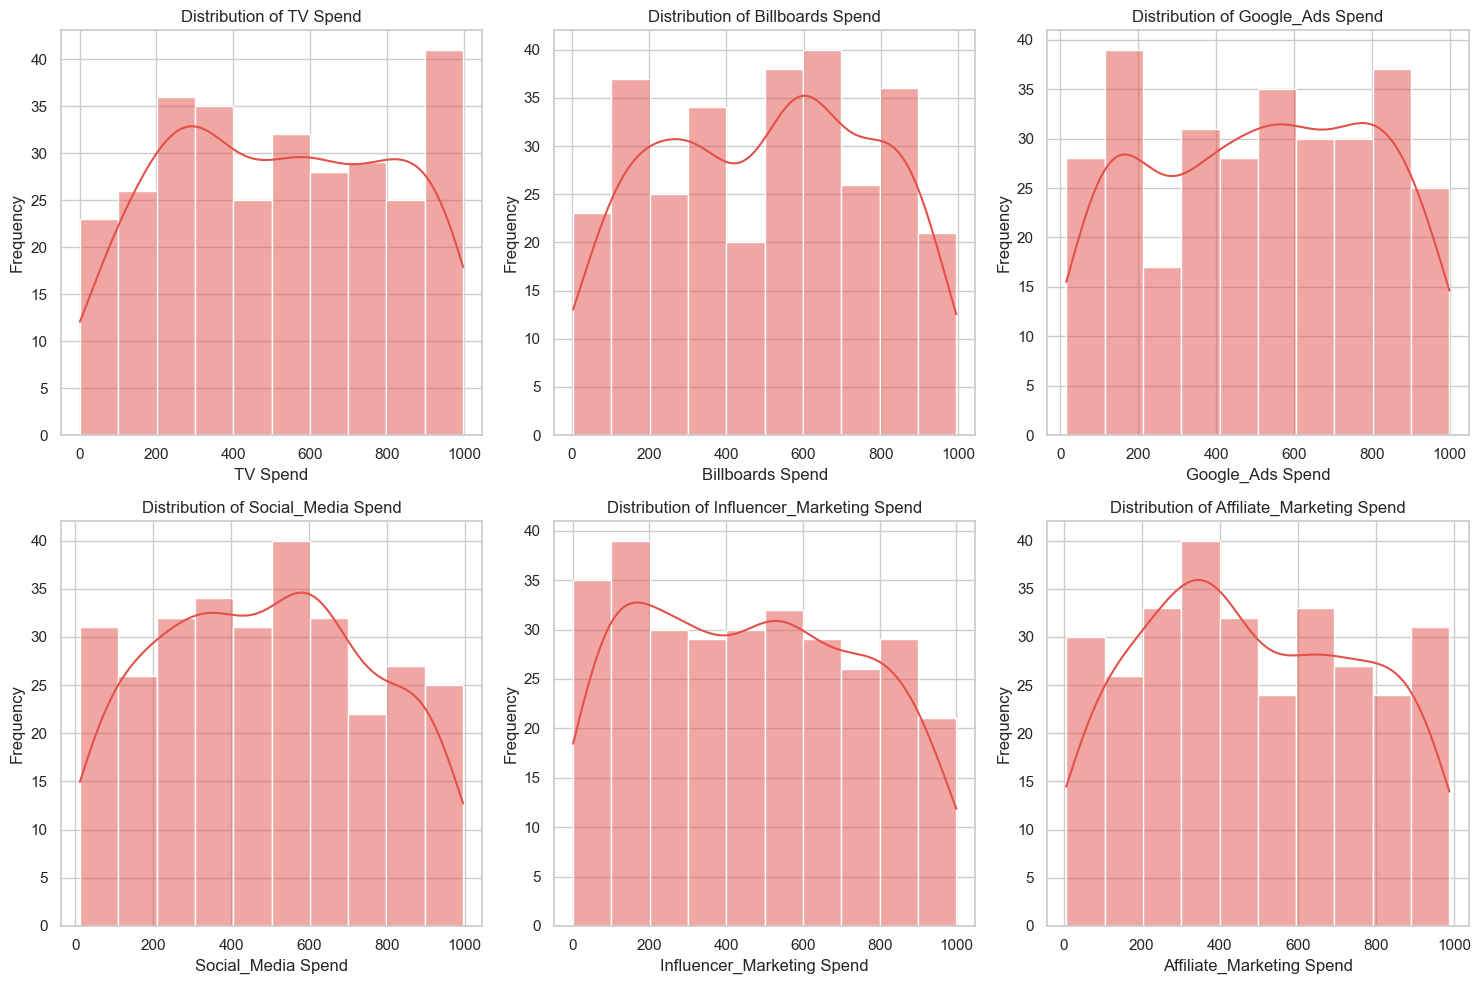

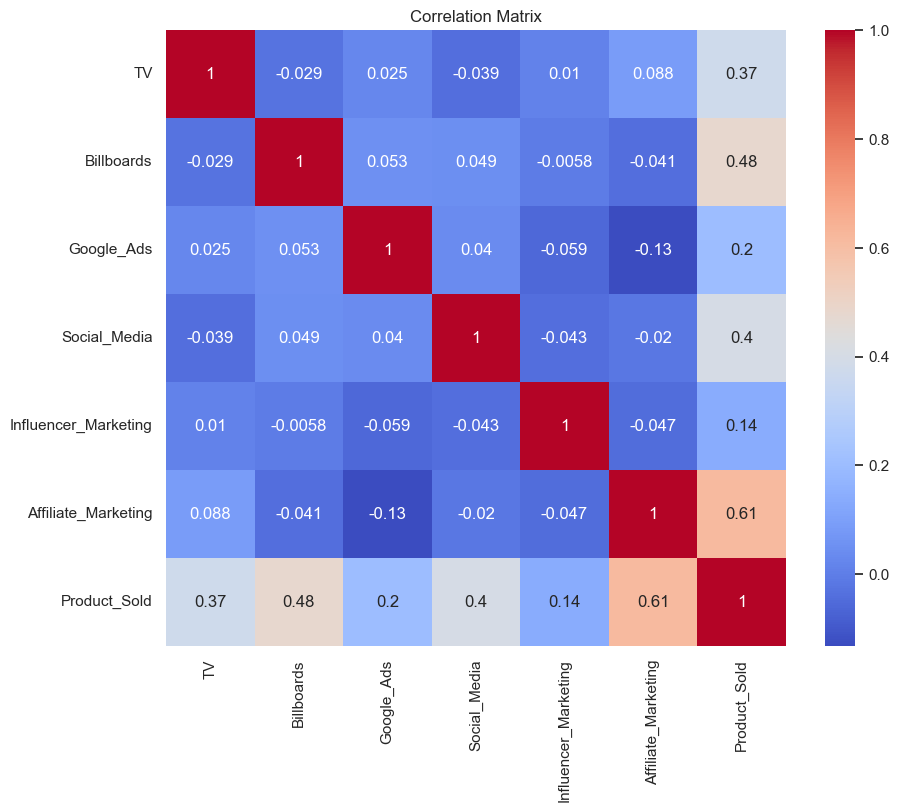

In [41]:
# Plotting distributions of advertising spends for each channel
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column} Spend')
    plt.xlabel(f'{column} Spend')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plotting correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [42]:
## Interactive Plot for Advertising Channel Selection

In [43]:
import plotly.express as px
from ipywidgets import interact

# Function to update the plot based on the selected channel
def update_plot(channel):
    fig = px.scatter(df, x=channel, y="Product_Sold",
                     title=f"{channel} Spend vs. Product Sales",
                     labels={channel: f"{channel} Spend", "Product_Sold": "Product Sales"})
    fig.show()

# Creating an interactive widget for channel selection
interact(update_plot, channel=df.columns[:-1])

interactive(children=(Dropdown(description='channel', options=('TV', 'Billboards', 'Google_Ads', 'Social_Media…

<function __main__.update_plot(channel)>

In [44]:
## Predictive Modeling

In [45]:
# Developing the Predictive Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = df[['TV', 'Billboards', 'Google_Ads', 'Social_Media', 'Influencer_Marketing', 'Affiliate_Marketing']]
y = df['Product_Sold']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, R2: {r2}')

MSE: 75.36591771291769, R2: 0.9999736866138691


In [46]:
## Detailed Regression Analysis

In [47]:
import statsmodels.api as sm

# Adding a constant to the independent variable
X = sm.add_constant(X)

# Building the OLS model (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

# Displaying the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Product_Sold   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.347e+06
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        01:43:27   Log-Likelihood:                -1123.6
No. Observations:                 300   AIC:                             2261.
Df Residuals:                     293   BIC:                             2287.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0887 

In [48]:
## Model Validation

In [49]:
# Cross-Validation of the Model

from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.linear_model import LinearRegression

# Prepare the data again for cross-validation
X = df[['TV', 'Billboards', 'Google_Ads', 'Social_Media', 'Influencer_Marketing', 'Affiliate_Marketing']]
y = df['Product_Sold']

# Building a new linear regression model for cross-validation
cross_val_model = LinearRegression()

# Performing cross-validation
cv_scores = cross_val_score(cross_val_model, X, y, cv=10, scoring='r2')

# Calculating the mean and standard deviation
cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)

print(f'CV Mean: {cv_mean}, CV Std: {cv_std}')

CV Mean: 0.9999579106494387, CV Std: 1.8193105539997894e-05


In [50]:
# Import library yang diperlukan
from IPython.display import display, Markdown

# Definisikan kesimpulan dan poin kunci
conclusion = """
🎯🚀
📊 AdOptima: Boost Sales with Smart Ad Spend 💡💰
Key Takeaways:
"""

key_takeaways = {
    "Data Analysis": "Our exploratory data analysis revealed significant insights into how different advertising channels contribute to product sales.",
    "Predictive Modeling": "We developed a robust linear regression model that can predict product sales based on ad spends, offering a valuable tool for budget allocation.",
    
}

future_directions = """
Future Directions:
- Incorporate more advanced machine learning models for enhanced prediction accuracy.
- Extend the dataset to include more variables like market trends, consumer behavior, or macroeconomic factors.

"""

# Tampilkan kesimpulan dan poin kunci dalam format Markdown
display(Markdown(conclusion))
for key, value in key_takeaways.items():
    display(Markdown(f"**{key}**: {value}"))
display(Markdown(future_directions))



🎯🚀
📊 AdOptima: Boost Sales with Smart Ad Spend 💡💰
Key Takeaways:


**Data Analysis**: Our exploratory data analysis revealed significant insights into how different advertising channels contribute to product sales.

**Predictive Modeling**: We developed a robust linear regression model that can predict product sales based on ad spends, offering a valuable tool for budget allocation.


Future Directions:
- Incorporate more advanced machine learning models for enhanced prediction accuracy.
- Extend the dataset to include more variables like market trends, consumer behavior, or macroeconomic factors.



In [51]:
#Exploratory Data Analysis

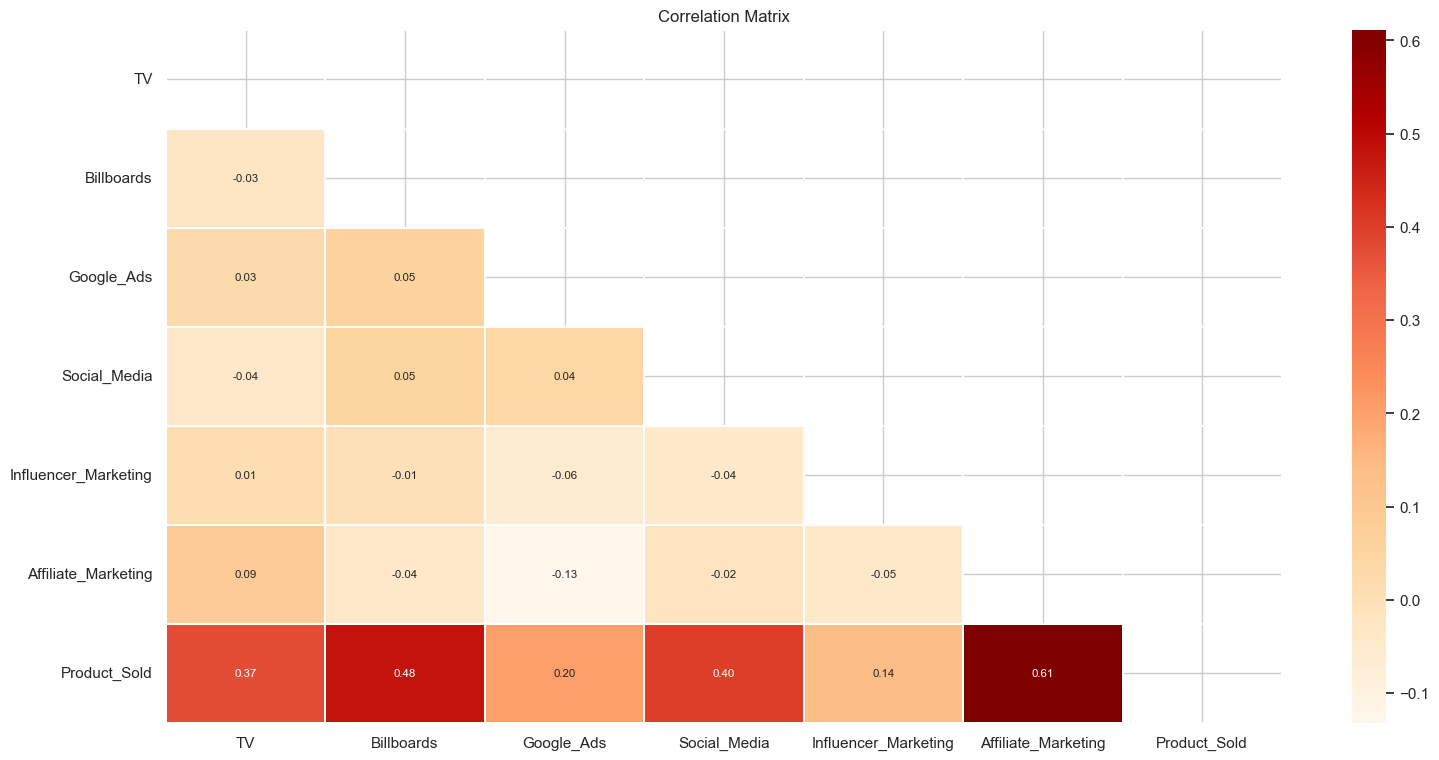

In [52]:
def plot_corr_heatmap(df):
    corr= df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    plt.figure(figsize=(18, 9))
    sns.heatmap(corr, cmap="OrRd", annot=True, fmt=".2f", linewidths=.33, annot_kws={"fontsize": "x-small"}, mask=mask)
    plt.title("Correlation Matrix")
    

# corr_train = train.copy()
# we must encode the categorical features for plotting
# corr_train[cat_features + [target]] = corr_train[cat_features + [target]].apply(lambda x: x.astype('category').cat.codes)
  
plot_corr_heatmap(df)

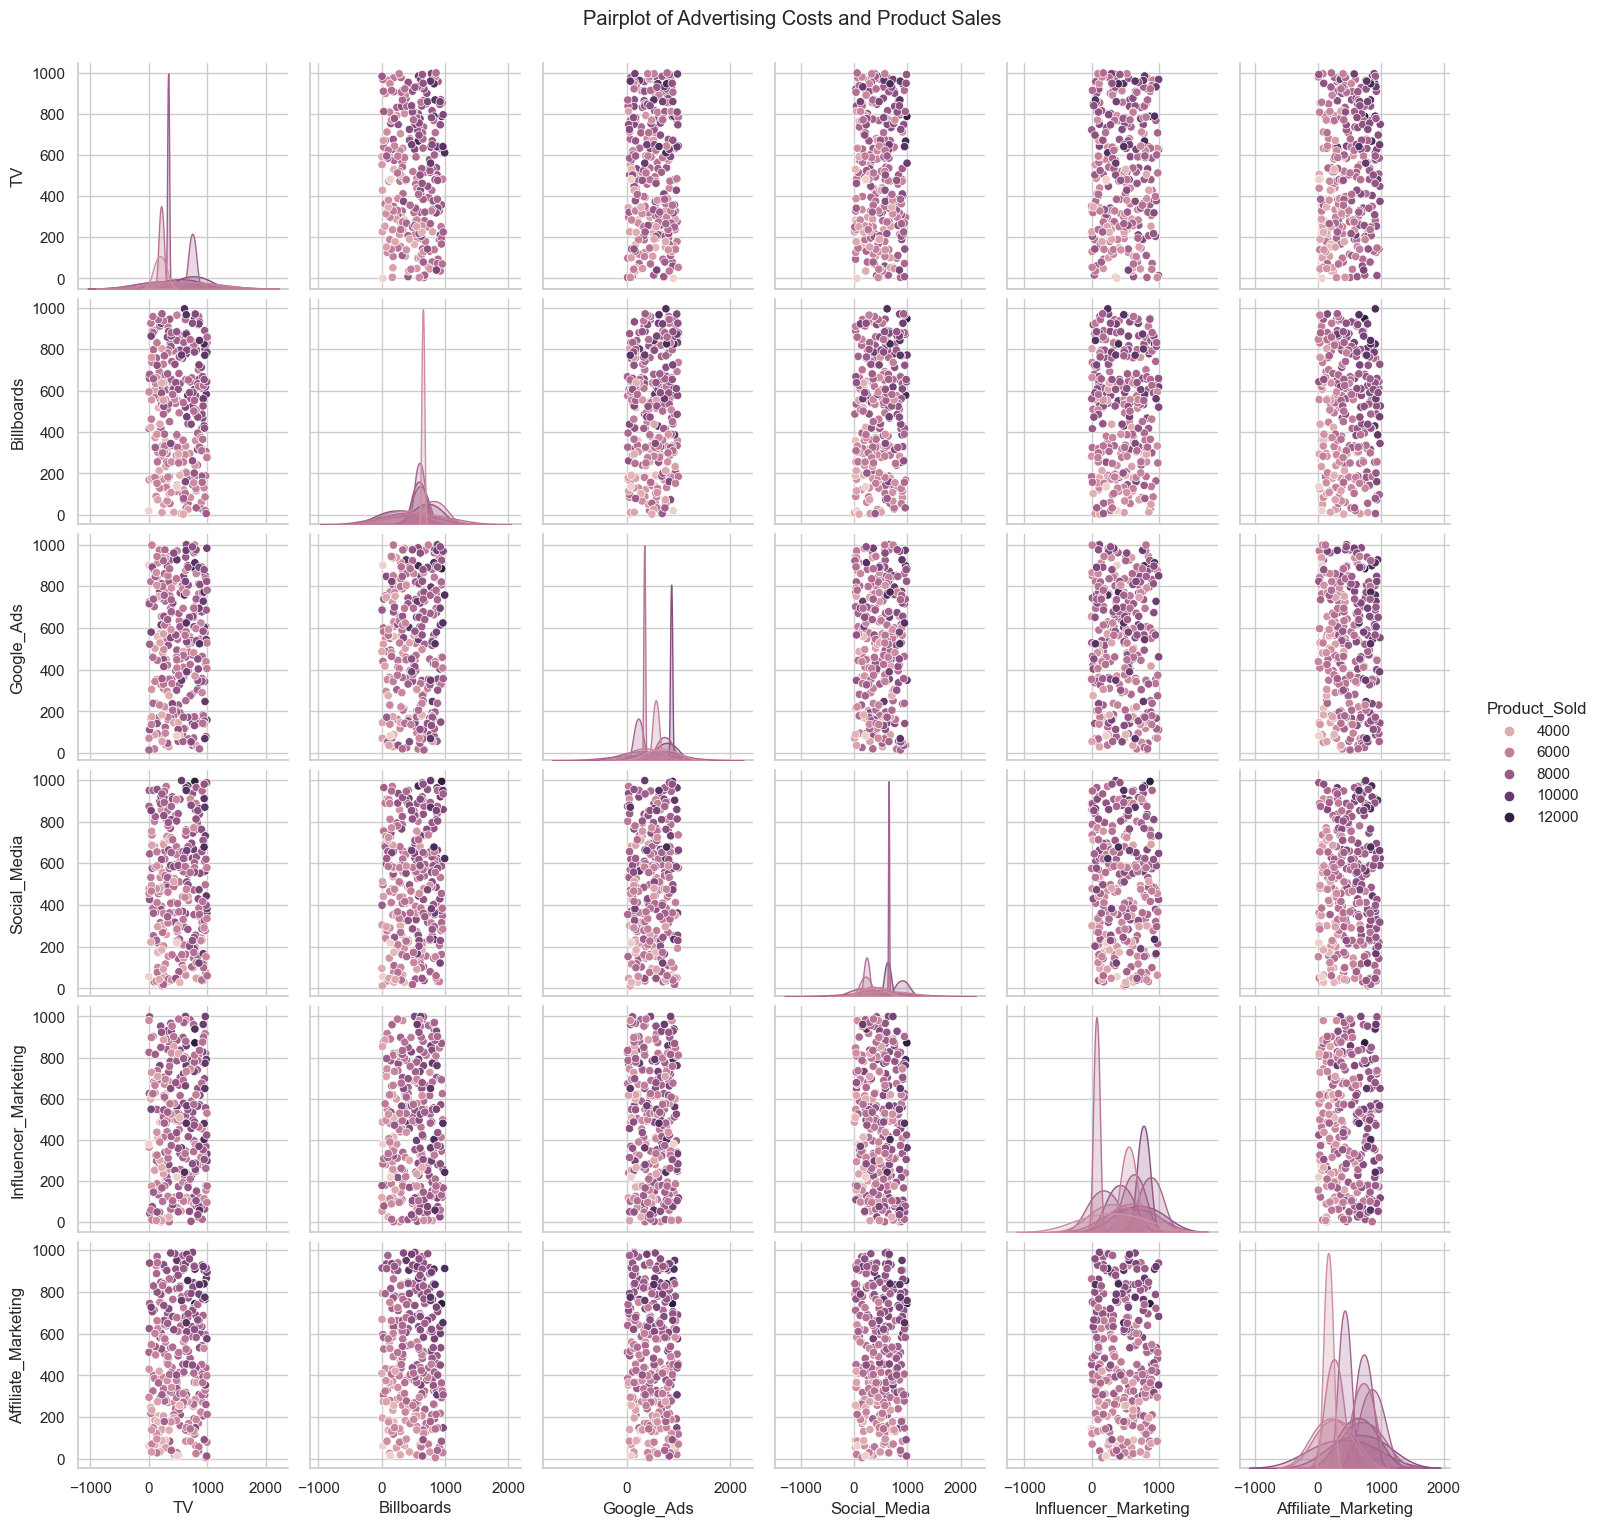

In [53]:
# Pairplot to visualize pairwise relationships
sns.pairplot(df, vars=df.columns[:-1], hue='Product_Sold')
plt.suptitle('Pairplot of Advertising Costs and Product Sales', y=1.02)
plt.show()

In [ ]:
## Basic OlS MODEL

                            OLS Regression Results                            
Dep. Variable:           Product_Sold   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.347e+06
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        01:58:35   Log-Likelihood:                -1123.6
No. Observations:                 300   AIC:                             2261.
Df Residuals:                     293   BIC:                             2287.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0887 

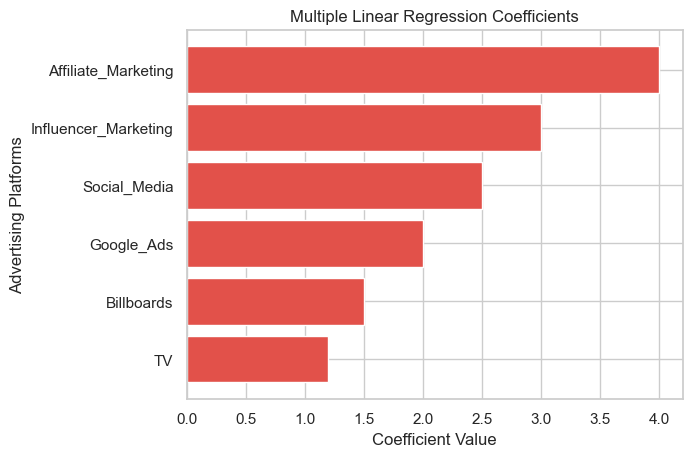

In [56]:
import statsmodels.api as sm

# Define independent variables (advertising costs on various platforms)
X = df[['TV', 'Billboards', 'Google_Ads', 'Social_Media', 'Influencer_Marketing', 'Affiliate_Marketing']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Define the dependent variable (product sales)
y = df['Product_Sold']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()
# Display the model summary
print(model.summary())

# Visualize the coefficients
coefficients = model.params[1:]  # Exclude the intercept term
platforms = coefficients.index


plt.barh(platforms, coefficients.sort_values())
plt.xlabel('Coefficient Value')
plt.ylabel('Advertising Platforms')
plt.title('Multiple Linear Regression Coefficients')
plt.show()

In [ ]:
## Market mix model and SHAP Explainer

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap


# Define independent variables (advertising costs on various platforms)
X = df[['TV', 'Billboards', 'Google_Ads', 'Social_Media', 'Influencer_Marketing', 'Affiliate_Marketing']]

# Define the dependent variable (product sales)
y = df['Product_Sold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model (or use your preferred model)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

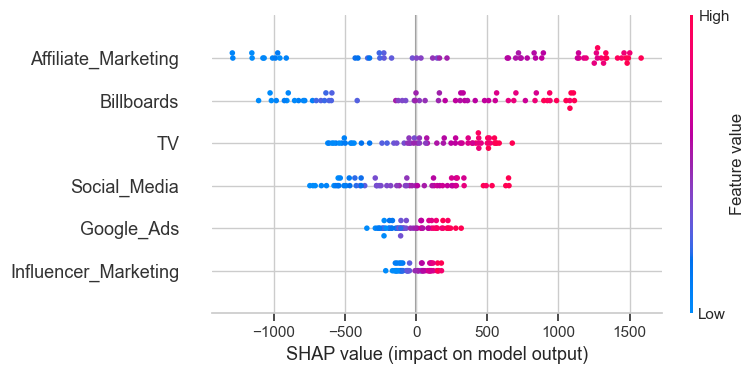

In [58]:
# Create a SHAP explainer
explainer = shap.Explainer(model)

# Calculate SHAP values for the testing set
shap_values = explainer.shap_values(X_test)

# Summary plot to visualize feature importance
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


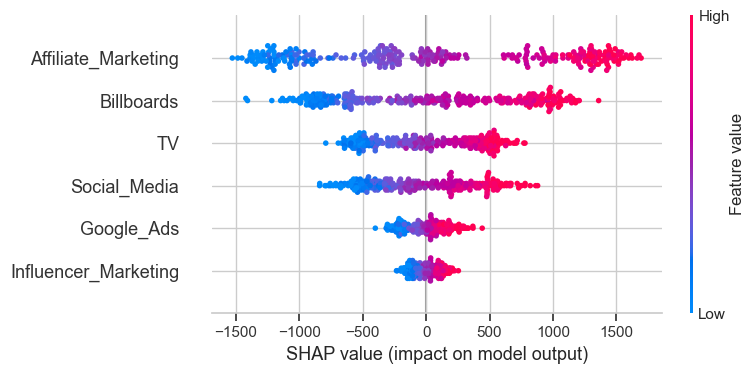

➡️ Each dot represents a specific prediction.
➡️ The x-axis shows the SHAP values, which represent the impact of each feature on the model output.
➡️ Features are listed on the y-axis, ordered by their average absolute SHAP values.
➡️ The color of each dot indicates the value of the feature for that prediction (blue for low values, red for high values).

## Interpretation:
➡️ Positive SHAP values (toward the right) indicate a positive impact on the model's prediction of higher product sales.
➡️ Negative SHAP values (toward the left) indicate a negative impact on the prediction of higher product sales.


In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt

# assuming X is your feature matrix and y is the target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train a random forest model
clf = RandomForestRegressor(n_estimators=100)
clf.fit(X_train, y_train)

# now you can create the explainer
explainer = shap.Explainer(clf)
shap_values = explainer(X)

# plot
shap.summary_plot(shap_values, X, plot_type="dot")

# interpretation
print("➡️ Each dot represents a specific prediction.")
print("➡️ The x-axis shows the SHAP values, which represent the impact of each feature on the model output.")
print("➡️ Features are listed on the y-axis, ordered by their average absolute SHAP values.")
print("➡️ The color of each dot indicates the value of the feature for that prediction (blue for low values, red for high values).")
print("\n## Interpretation:")
print("➡️ Positive SHAP values (toward the right) indicate a positive impact on the model's prediction of higher product sales.")
print("➡️ Negative SHAP values (toward the left) indicate a negative impact on the prediction of higher product sales.")
